<a href="https://colab.research.google.com/github/jj2883/Applied_DL_COMS4995/blob/master/App_DL_HW1_jj2883.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#install tensorflow 2.0
!pip install tf-nightly-2.0-preview

In [0]:
import tensorflow as tf
print("You have version", tf.__version__)

You have version 2.0.0-dev20190213


Part 1 - 1

In [0]:
#import necessary packages

import tensorflow as tf
import matplotlib.pyplot as plt

#import fashion mnist dataset
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [0]:
#Assign Train and Test data and label
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
#create a linear model to classify dataset
model = Sequential([
  Flatten(input_shape=(28,28)),
  Dense(10, 'softmax')
])

#define optimizer and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
#train the linear model and validate it using the test dataset. The epoch was set to 5
lin_model = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4069 - acc: 0.8590 - val_loss: 0.4630 - val_acc: 0.8397
Epoch 2/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4024 - acc: 0.8601 - val_loss: 0.4691 - val_acc: 0.8380
Epoch 3/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3974 - acc: 0.8625 - val_loss: 0.4435 - val_acc: 0.8450
Epoch 4/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3950 - acc: 0.8630 - val_loss: 0.4455 - val_acc: 0.8441
Epoch 5/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3930 - acc: 0.8638 - val_loss: 0.4490 - val_acc: 0.8419


The highest validation accuracy of a linear model was 84.5% at epoch 3.

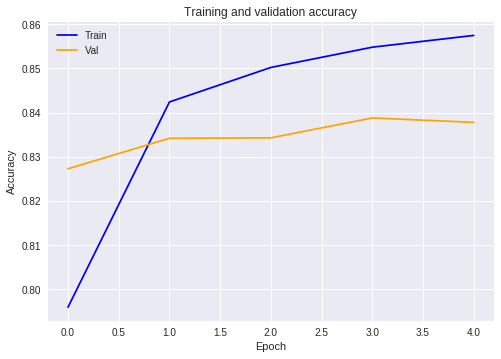

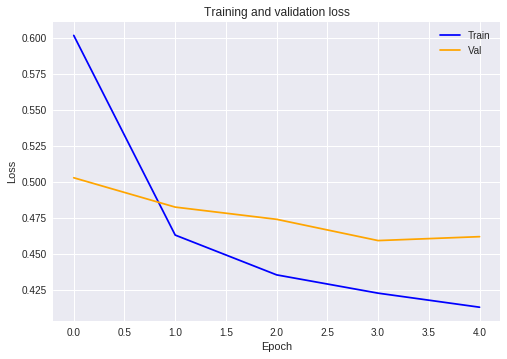

In [0]:
# The history object contains results on the training and test
# sets for each epoch

#plot the result
acc = lin_model.history['acc']
val_acc = lin_model.history['val_acc']
loss = lin_model.history['loss']
val_loss = lin_model.history['val_loss']

# Get the number of epochs
epochs = range(len(acc))

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, color='blue', label='Train')
plt.plot(epochs, val_acc, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

_ = plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, color='blue', label='Train')
plt.plot(epochs, val_loss, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Part 1 - 2

In [0]:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
#4 layered neural network
dep_model = Sequential([
  Flatten(input_shape=(28,28)),
  Dense(256, 'relu'),
  Dense(128, 'relu'),
  Dense(64, 'relu'),
  Dense(10, 'softmax')
])

#to reduce overfitting, i set the learning rate to be 0.0001
opt =tf.keras.optimizers.Adam(learning_rate=0.0005)
#dep_model.compile(optimizer='adam',
dep_model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
deep_model = dep_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30)


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000==============================] - 9s 152us/sample - loss: 0.4964 - acc: 0.8223 - val_loss: 0.4030 - val_acc: 0.8577
Epoch 2/30
60000/60000==============================] - 9s 143us/sample - loss: 0.3620 - acc: 0.8673 - val_loss: 0.3822 - val_acc: 0.8641
Epoch 3/30
60000/60000==============================] - 8s 140us/sample - loss: 0.3231 - acc: 0.8820 - val_loss: 0.3468 - val_acc: 0.8754
Epoch 4/30
60000/60000==============================] - 8s 139us/sample - loss: 0.2988 - acc: 0.8899 - val_loss: 0.3667 - val_acc: 0.8645
Epoch 5/30
60000/60000==============================] - 8s 136us/sample - loss: 0.2803 - acc: 0.8954 - val_loss: 0.3490 - val_acc: 0.8770
Epoch 6/30
60000/60000==============================] - 9s 142us/sample - loss: 0.2666 - acc: 0.8997 - val_loss: 0.3205 - val_acc: 0.8846
Epoch 7/30
60000/60000==============================] - 8s 140us/sample - loss: 0.2537 - acc: 0.9056 - val_loss: 0.3415 - 

The training accuracy is increasing as epoch is increasing, but the validation accuracy seems to be maxed at 89.6% during the 28th epoch. Initially when I trained the model with learning rate of 0.001 and 3 dense layers, there seemed to be a overfitting as both the training and validation accuracies were fluctuating a lot, and got a poor validation accuracy. So I set the learning rate to 0.0005 in Adam optimizer to alleviate the overfitting, and increased the depth of the model to 4 layers to increase the accuracy.

Part 1 - 3

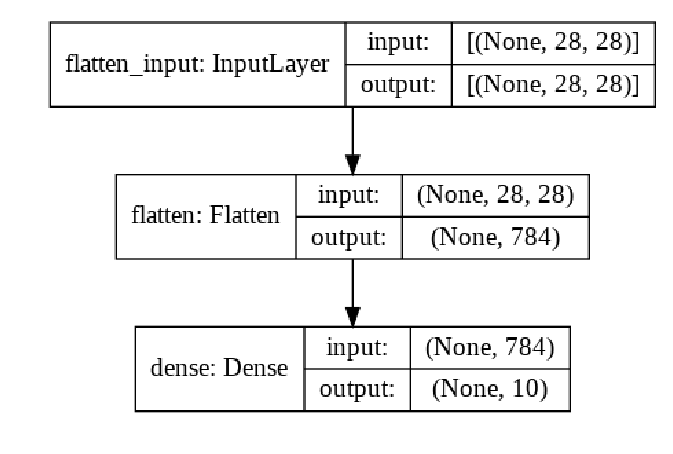

In [0]:
#Plot for Linear Model

from tensorflow import keras
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image_path = 'lin_model.png'
keras.utils.plot_model(model, 
                       show_shapes=True,
                       to_file=image_path)

plt.figure(dpi=100)
imgplot = plt.imshow(mpimg.imread(image_path))
plt.axis('off')
plt.show()

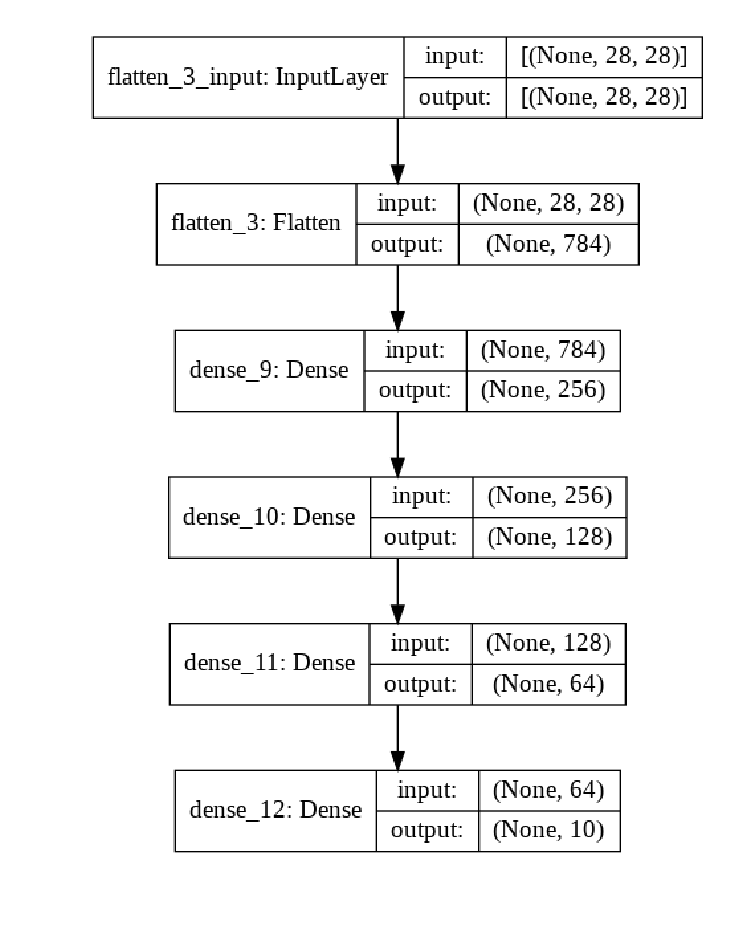

In [0]:
#Plot for deep model

image_path = 'dep_model.png'
keras.utils.plot_model(dep_model, 
                       show_shapes=True,
                       to_file=image_path)

plt.figure(dpi=200)
imgplot = plt.imshow(mpimg.imread(image_path))
plt.axis('off')
plt.show()

The deep model has 4 layers.

Part 1 - 4

Linear Model Confusion matrix, without normalization
[[884   4  12  10   6   1  71   0  12   0]
 [  1 983   2   5   7   0   1   0   1   0]
 [ 22   1 619   6 274   0  77   0   1   0]
 [ 40  15  10 829  74   0  23   0   9   0]
 [  1   1  21   8 948   0  20   0   1   0]
 [  0   0   0   0   0 955   0  18   2  25]
 [152   1  64  13 138   1 622   0   9   0]
 [  0   0   0   0   0   6   0 951   1  42]
 [  7   0   2   1   4   1   5   1 978   1]
 [  0   0   0   1   1   4   1  22   1 970]]
Linear Model Normalized confusion matrix
[[0.88 0.   0.01 0.01 0.01 0.   0.07 0.   0.01 0.  ]
 [0.   0.98 0.   0.01 0.01 0.   0.   0.   0.   0.  ]
 [0.02 0.   0.62 0.01 0.27 0.   0.08 0.   0.   0.  ]
 [0.04 0.01 0.01 0.83 0.07 0.   0.02 0.   0.01 0.  ]
 [0.   0.   0.02 0.01 0.95 0.   0.02 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.95 0.   0.02 0.   0.03]
 [0.15 0.   0.06 0.01 0.14 0.   0.62 0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.95 0.   0.04]
 [0.01 0.   0.   0.   0.   0.   0.01 0.   0.98 0.  

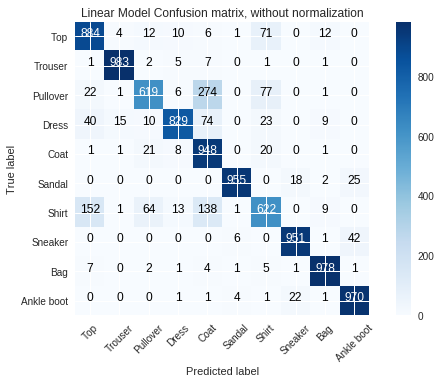

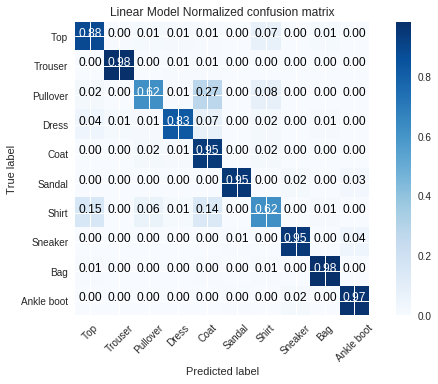

In [0]:
import tensorflow as tf
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Split the data into a training set and a test set
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#manually create labels for Fashion MNIST
class_names = ['Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



#get the predicted result
y_pred = dep_model.predict(X_test)
#make the prediction into 1 dimensional array
prediction=tf.argmax(y_pred,1)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Linear Model Normalized confusion matrix")
    else:
        print('Linear Model Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix of linear network
cnf_matrix = confusion_matrix(y_test, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Linear Model Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Linear Model Normalized confusion matrix')

plt.show()

Part 2 - 5

In [0]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten

In [0]:
#Assign Train and Test data and label
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
#Set dataset into batch size of 128, and shuffle the data
BATCH_SIZE = 128
BUFFER_SIZE = len(x_train)

mnist_train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
mnist_test = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

In [0]:
#create subclass of a linear model and create a linear model object
class Lin_Model(Model):
  def __init__(self):
    super(Lin_Model, self).__init__()
    self.flatten = Flatten(input_shape=(28,28))
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    return self.d2(x)
  
lin_model = Lin_Model()

In [0]:
#choose optimizer and loss function
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam()

In [0]:
#define metric of train and test
train_loss_metric = tf.keras.metrics.Mean(name='train_loss')
test_loss_metric = tf.keras.metrics.Mean(name='test_loss')

train_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [0]:
def train_step(images, labels):
  with tf.GradientTape() as tape:    
    # Forward pass
    predictions = lin_model(images)
    train_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Backward pass
  gradients = tape.gradient(train_loss, lin_model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, lin_model.trainable_variables))

  # Record results
  train_loss_metric(train_loss)
  train_accuracy_metric(labels, predictions)

In [0]:

def test_step(images, labels):
  predictions = lin_model(images)
  test_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Record results
  test_loss_metric(test_loss)
  test_accuracy_metric(labels, predictions)

In [0]:
EPOCHS = 10

#list that holds metrics
train_loss_history = []
train_acc_history = []
test_loss_history = []
test_acc_history = []

#actual training and validation
for epoch in range(EPOCHS):
  for images, labels in mnist_train:
    train_step(images, labels)
  
  for test_images, test_labels in mnist_test:
    test_step(test_images, test_labels)
  
  template = 'Epoch {}, Loss: {:.4f}, Accuracy: {:.2f}, Test loss: {:.4f}, Test accuracy: {:.2f}'
  print (template.format(epoch +1, 
                         train_loss_metric.result(), 
                         train_accuracy_metric.result() * 100, 
                         test_loss_metric.result(), 
                         test_accuracy_metric.result() * 100))
  train_loss_history.append(train_loss_metric.result())
  train_acc_history.append(train_accuracy_metric.result())
  test_loss_history.append(test_loss_metric.result())
  test_acc_history.append(test_accuracy_metric.result())


Epoch 1, Loss: 0.4185, Accuracy: 85.65, Test loss: 0.4579, Test accuracy: 84.12
Epoch 2, Loss: 0.4169, Accuracy: 85.70, Test loss: 0.4573, Test accuracy: 84.13
Epoch 3, Loss: 0.4154, Accuracy: 85.75, Test loss: 0.4568, Test accuracy: 84.15
Epoch 4, Loss: 0.4139, Accuracy: 85.79, Test loss: 0.4563, Test accuracy: 84.16
Epoch 5, Loss: 0.4126, Accuracy: 85.83, Test loss: 0.4558, Test accuracy: 84.17
Epoch 6, Loss: 0.4113, Accuracy: 85.87, Test loss: 0.4554, Test accuracy: 84.18
Epoch 7, Loss: 0.4100, Accuracy: 85.91, Test loss: 0.4550, Test accuracy: 84.19
Epoch 8, Loss: 0.4088, Accuracy: 85.94, Test loss: 0.4546, Test accuracy: 84.20
Epoch 9, Loss: 0.4077, Accuracy: 85.97, Test loss: 0.4542, Test accuracy: 84.21
Epoch 10, Loss: 0.4066, Accuracy: 86.01, Test loss: 0.4539, Test accuracy: 84.21


The maximum accuracy is about 84.2% for the linear model.

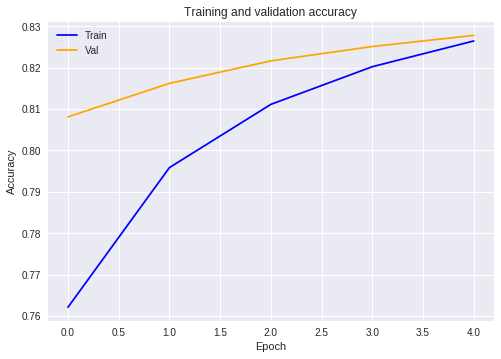

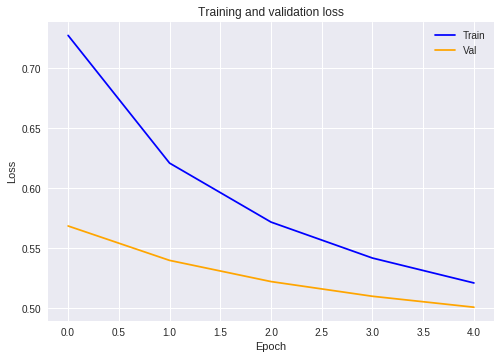

In [0]:
#plot the result
#acc = lin_model.history['acc']
#val_acc = lin_model.history['val_acc']
#loss = lin_model.history['loss']
#val_loss = lin_model.history['val_loss']

acc = train_acc_history
val_acc = test_acc_history
loss = train_loss_history
val_loss = test_loss_history



# Get the number of epochs
epochs = range(len(acc))

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, color='blue', label='Train')
plt.plot(epochs, val_acc, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

_ = plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, color='blue', label='Train')
plt.plot(epochs, val_loss, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Part 2 - 6

In [0]:
#Assign Train and Test data and label
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
#Set dataset into batch size of 128, and shuffle the data
BATCH_SIZE = 128
BUFFER_SIZE = len(x_train)

mnist_train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
mnist_test = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

In [0]:
#create subclass of a linear model and create a linear model object

#4 layer deep model
class Deep_Model(Model):
  def __init__(self):
    super(Deep_Model, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(256, activation='relu')
    self.d2 = Dense(129, activation='relu')
    self.d3 = Dense(64, activation='relu')
    self.d4 = Dense(10, activation='softmax')

    
  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = self.d2(x)
    x = self.d3(x)
    return self.d4(x)
  
deep_model = Deep_Model()

In [0]:
#choose optimizer and loss function
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam()

In [0]:
#define metric of train and test
train_loss_metric = tf.keras.metrics.Mean(name='train_loss')
test_loss_metric = tf.keras.metrics.Mean(name='test_loss')

train_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [0]:
def train_step(images, labels):
  with tf.GradientTape() as tape:    
    # Forward pass
    predictions = deep_model(images)
    train_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Backward pass
  gradients = tape.gradient(train_loss, deep_model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, deep_model.trainable_variables))

  # Record results
  train_loss_metric(train_loss)
  train_accuracy_metric(labels, predictions)

In [0]:

def test_step(images, labels):
  predictions = deep_model(images)
  test_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Record results
  test_loss_metric(test_loss)
  test_accuracy_metric(labels, predictions)

In [0]:
EPOCHS = 100
train_loss_history = []
train_acc_history = []
test_loss_history = []
test_acc_history = []
for epoch in range(EPOCHS):
  for images, labels in mnist_train:
    train_step(images, labels)
  
  for test_images, test_labels in mnist_test:
    test_step(test_images, test_labels)
  
  template = 'Epoch {}, Loss: {:.4f}, Accuracy: {:.2f}, Test loss: {:.4f}, Test accuracy: {:.2f}'
  print (template.format(epoch +1, 
                         train_loss_metric.result(), 
                         train_accuracy_metric.result() * 100, 
                         test_loss_metric.result(), 
                         test_accuracy_metric.result() * 100))
  train_loss_history.append(train_loss_metric.result())
  train_acc_history.append(train_accuracy_metric.result())
  test_loss_history.append(test_loss_metric.result())
  test_acc_history.append(test_accuracy_metric.result())


Epoch 1, Loss: 0.0520, Accuracy: 98.11, Test loss: 0.8231, Test accuracy: 88.31
Epoch 2, Loss: 0.0519, Accuracy: 98.11, Test loss: 0.8237, Test accuracy: 88.31
Epoch 3, Loss: 0.0518, Accuracy: 98.12, Test loss: 0.8243, Test accuracy: 88.31
Epoch 4, Loss: 0.0516, Accuracy: 98.12, Test loss: 0.8251, Test accuracy: 88.31
Epoch 5, Loss: 0.0515, Accuracy: 98.13, Test loss: 0.8257, Test accuracy: 88.31
Epoch 6, Loss: 0.0514, Accuracy: 98.13, Test loss: 0.8264, Test accuracy: 88.31
Epoch 7, Loss: 0.0513, Accuracy: 98.14, Test loss: 0.8271, Test accuracy: 88.31
Epoch 8, Loss: 0.0512, Accuracy: 98.14, Test loss: 0.8277, Test accuracy: 88.31
Epoch 9, Loss: 0.0511, Accuracy: 98.15, Test loss: 0.8284, Test accuracy: 88.31
Epoch 10, Loss: 0.0510, Accuracy: 98.15, Test loss: 0.8290, Test accuracy: 88.31
Epoch 11, Loss: 0.0508, Accuracy: 98.16, Test loss: 0.8296, Test accuracy: 88.32
Epoch 12, Loss: 0.0507, Accuracy: 98.16, Test loss: 0.8302, Test accuracy: 88.32
Epoch 13, Loss: 0.0506, Accuracy: 98.

The maximum test accuracy I got from deep subclass model was 88.4%. The test accuracy could increase  a little bit more, but not much more than 88%.